In [1]:
from Model import SIRModel
from mesa.batchrunner import BatchRunnerMP
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
susceptible, infected, recovered = 99, 1, 0
width = height = 10
infection_radius = 0.30
infection_probability = 0.20
recovery_time = 5

In [3]:
M = SIRModel(susceptible, infected, recovered, width, height, infection_radius, infection_probability, recovery_time)

In [4]:
while M.distribution['I'] > 0:
    M.step()
    
run_data = M.datacollector.get_model_vars_dataframe()

KeyError: "None of [Index(['S', 'I', 'R'], dtype='object')] are in the [index]"

In [ ]:
run_data

In [9]:
fixed_params = {
    "S": susceptible,
    "I": infected,
    "R": recovered,
    "width": width,
    "height": height,
    "infectious_radius": infection_radius,
    "infectious_prob": infection_probability,
    "recovery_time": recovery_time
}

variable_params = {}

In [10]:
batch_run = BatchRunnerMP(
    SIRModel,
    nr_processes=4,
    variable_parameters=variable_params,
    fixed_parameters=fixed_params,
    iterations=10,
    model_reporters={"SIR_Data": get_sir_distribution}
)

In [11]:
batch_run.run_all()

10it [00:21,  2.16s/it]


In [12]:
run_data = batch_run.get_model_vars_dataframe()

In [13]:
run_data

Run    SIR_Data   S  I  R  width  height  infectious_radius  \
0    0  (99, 1, 0)  99  1  0     10      10                0.3   
1    1  (99, 1, 0)  99  1  0     10      10                0.3   
2    2  (99, 1, 0)  99  1  0     10      10                0.3   
3    3  (98, 2, 0)  99  1  0     10      10                0.3   
4    4  (97, 3, 0)  99  1  0     10      10                0.3   
5    5  (99, 1, 0)  99  1  0     10      10                0.3   
6    6  (99, 1, 0)  99  1  0     10      10                0.3   
7    7  (98, 2, 0)  99  1  0     10      10                0.3   
8    8  (98, 2, 0)  99  1  0     10      10                0.3   
9    9  (99, 1, 0)  99  1  0     10      10                0.3   

   infectious_prob  recovery_time  
0              0.2              5  
1              0.2              5  
2              0.2              5  
3              0.2              5  
4              0.2              5  
5              0.2              5  
6              0.2              5  
7              0.2              5  
8              0.2              5  
9              0.2              5

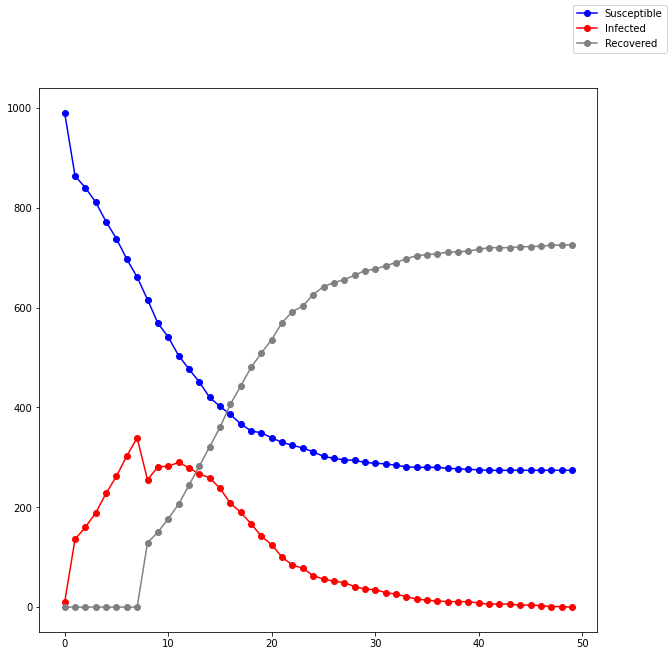

In [247]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

ax.plot(S, color='blue', label='Susceptible', marker='o')
ax.plot(I, color='red', label='Infected', marker='o')
ax.plot(R, color='grey', label='Recovered', marker='o')
fig.legend()
fig.savefig('epidemic_base.png')

In [218]:
plt.show()

In [144]:
def update(i, agents):
    print('step', i)
    for index, agent in enumerate(agents):
        df = particle_dataframe.xs(i).xs(index)
        agent.center = df['Agent Position']
        agent.color = color_dict[df['Agent State']]
    return agents

In [145]:
initial_state = particle_dataframe.xs(0)
agents = []

(0.0, 30.0)

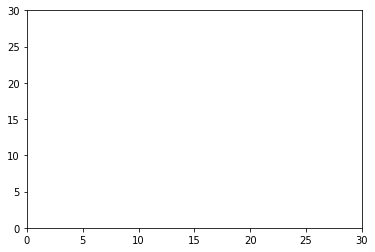

In [146]:
fig, ax = plt.subplots()
ax.set_xlim(0, width)
ax.set_ylim(0, height)

In [147]:
for i in range(initial_state.shape[0]):
    agents.append( ax.add_patch(Circle(initial_state.xs(i)['Agent Position'],
                   radius=0.2,
                   color=color_dict[initial_state.xs(i)['Agent State'] ])) )

In [148]:
anim = FuncAnimation(fig, update, frames=sim_dataframe.shape[0], fargs=(agents,))
anim.save('Animation.mp4')

step 0
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29
step 30
step 31
step 32
step 33
step 34
step 35
step 36
step 37
step 38
step 39
step 40
step 41
step 42
step 43
step 44
step 45
step 46
step 47
step 48
step 49
step 50
step 51
step 52
step 53
step 54
step 55
step 56
step 57
step 58
step 59
step 60
step 61
step 62
step 63
step 64
step 65
step 66
step 67
step 68
step 69
step 70
step 71
step 72
step 73
step 74
step 75
step 76
step 77
step 78
step 79
step 80
step 81
step 82
step 83
step 84
step 85
step 86
step 87
step 88
step 89
step 90


In [149]:
S = D[:,0]
I = D[:,1]
R = D[:,2]

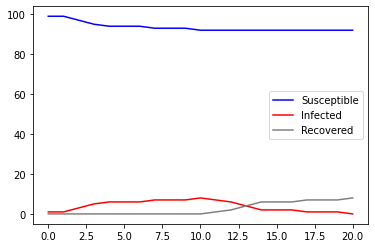